# Sensitivity analysis


In [ ]:
# grblogtool
# !pip install grblogtools
import grblogtools as glt
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:

results = glt.parse(["Outputs/Logfiles/model_moo*.log"])
summary = results.summary()

In [ ]:
summary.columns

In [ ]:
summary = summary[['Runtime','ObjVal', 'ObjBound', 'RelaxObj', 'IterCount']].dropna()

In [ ]:
glt.plot(summary.sort_values(by="Runtime"),
         type="bar",
         color="Log")

In [ ]:
progress_iteration = results.progress("nodelog")
display(progress_iteration.columns)
progress_iteration[['LogFilePath', 'Incumbent', 'BestBd', 'Gap']]


In [ ]:
results.progress("rootlp")

In [ ]:
summary

In [ ]:
summary[['ObjVal', 'RelaxObj']].dropna().to_csv('obj1vsobj2.csv')

In [ ]:
glt.plot(summary)

In [ ]:
glt.plot(summary.sort_values(by="Runtime"), #
         x = "IterCount", y = "ObjVal", type="scatter",
         color="LogFilePath",
         log_x=True,
         title="Gurobi Performance")

In [ ]:
summary, timelines = glt.get_dataframe(["Outputs/Logfiles/model_moo*.log"], timelines=True)

In [ ]:
timelines

In [ ]:
glt.plot(timelines[timelines["Log"]=="model_moo(Mar 01,2217)"], type='line', y='Gap', color='Seed')

In [ ]:
glt.plot(summary, x= 'Time', y='Gap', color='Seed', type="line")

In [ ]:
glt.plot(summary, x= 'IterCount', y='ObjVal' ,type="scatter")

# Surface Plot

In [ ]:
import random
cover_v1 = [0.7, .5,.8,.95,.8,.81,.74,.9]
deploy_v2 = [42, 50,66,70,54,88,92,60]
obj2 = [random.random()*cover_v1[i]+ random.random()*deploy_v2[i] for i in range(8)]
obj2

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

cover_v1, deploy_v2 = np.meshgrid(cover_v1, deploy_v2)
obj2 =obj2 

# Plot the surface.
surf = ax.plot_surface(deploy_v2, deploy_v2, obj2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
print(X)
print('Z')
print(R)

# Multiscene

# Pareto Front


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data_pareto_front = pd.read_excel('Outputs/pareto front.xlsx', sheet_name='pareto front2')
data_pareto_front

,Facility,Max Coverage,Min Cost,Unnamed: 3,Unnamed: 4,Unnamed: 5,Max,Min
0,Proposed,0.747688,260000,NaN,6335.19,NaN,1.000000,190000.0
1,Proposed,0.747688,260000,NaN,6335.19,NaN,0.991970,180000.0
2,Proposed,0.367335,230000,NaN,3112.44,NaN,0.886893,160000.0
3,Proposed,0.886893,160000,NaN,7514.68,NaN,0.510523,40000.0
4,Proposed,0.872138,180000,NaN,7389.66,NaN,0.209889,40000.0
5,Proposed,0.707361,180000,NaN,5993.50,NaN,NaN,NaN
6,Proposed,0.308082,170000,NaN,2610.39,NaN,NaN,NaN
7,Proposed,0.885160,190000,NaN,7500.00,NaN,NaN,NaN
8,Proposed,0.338890,180000,NaN,2871.43,NaN,NaN,NaN
9,Proposed,1.000000,190000,NaN,8473.04,NaN,NaN,NaN


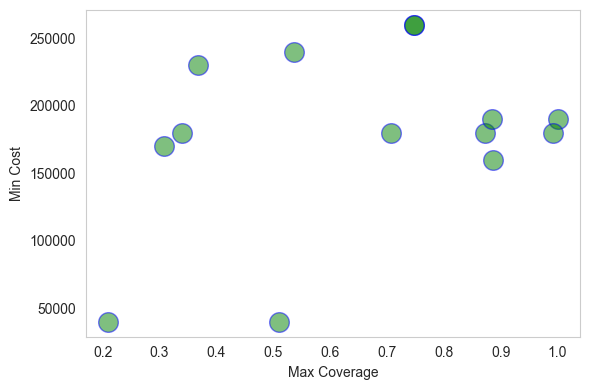

In [36]:
plt.figure(figsize=(6,4))
plt.scatter(data=data_pareto_front, x='Max Coverage', y='Min Cost',
            alpha=0.5, edgecolors='b', s=200, color='g')
plt.xlabel('Max Coverage')
plt.ylabel('Min Cost')
plt.grid(False)
plt.tight_layout()
plt.savefig('Outputs/pareto_front.png', transparent=True)

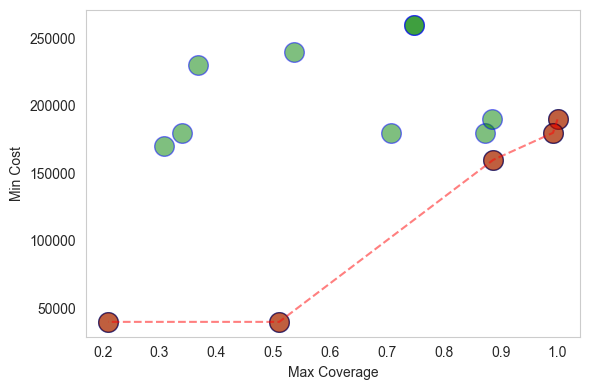

In [41]:
plt.figure(figsize=(6,4))
plt.scatter(data=data_pareto_front, x='Max Coverage', y='Min Cost',
            alpha=0.5, edgecolors='b', s=200, color='g')
plt.scatter(data=data_pareto_front, x='Max', y='Min',
            alpha=0.5, edgecolors='black', s=200, color='r')
Max = data_pareto_front[['Max']]
Min = data_pareto_front[['Min']]
plt.plot(Max, Min,
            ls='--', alpha=0.5, color='r')
plt.xlabel('Max Coverage')
plt.ylabel('Min Cost')
plt.grid(False)
plt.tight_layout()
#plt.axis('off')
plt.savefig('Outputs/pareto_frontier_points.png', transparent=True)

## a. Facility location

In [ ]:
# Draw the Arctic Map
fig, ax = plt.subplots(figsize=(10,10))  #++

# Load geometric file for map
ArcticMap = gpd.read_file("Inputs/ArcGIS_data/ArcticShapefile2/ArcticShapefile2.shp")
ArcticMap = ArcticMap.to_crs(epsg=4326)  # 3857
ArcticLand = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic'])]
ArcticWater = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic-Water'])]
ArcticLand.plot(ax=ax, color="seashell")
ArcticWater.plot(ax=ax, color="lightskyblue")

## b. Resource allocation

## c. compare outputs (coverage, cost, time) by Boxplot /violin plot

In [ ]:
fig, ax = plt.subplots(figsize=(3,6), dpi=300, alpha=.1)
sns.boxplot(data= coverage_df_stacked, ax=ax, x='', y='Coverage')
sns.stripplot(data= coverage_df_stacked, ax=ax, x='', y='Coverage')
plt.show()
fig.savefig('Outputs/boxplot.png', transparent=True)

In [ ]:
coverage_df_stacked.columns